# Prática Guiada: Árvore de decisão.

# Implementação da Árvore de Decisão ([`Decision Tree`](https://www.geeksforgeeks.org/decision-tree-implementation-python/))

#### Desenvolver um modelo que faça a predição da classe dos veículos do [`Car Evaluation Data Set`](http://archive.ics.uci.edu/ml/datasets/Car+Evaluation) da UCI utilizando o algoritmo [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

## Objetivo: 

#### Utilizando os códigos usados em aula, chegar em resultado com `Accuracy` $= 0.953757225433526$.

## Avançado: 

#### Melhorar a acurácia com outros algoritmos de classificação.

--------------------

# Importar as biblotecas e verificar os dados

In [1]:
import os
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

#### Acessamos um `dataset`com informações sobre veículos. Valoer de venda/compra, de manutenção, de número de portas, tamanho de bagageiro, nível de segurança e classe.

In [2]:
#data = pd.read_csv('http://www.dropbox.com/s/sufjojzkqyc2h79/car.data?dl=1',\
#                   names=['buying','maint','doors','persons','lug_boot','safety','class'])
data = pd.read_csv('car.data', 
                   names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
                  )
data.head()
#for i in data.columns:
#    print(i,':', data[i].unique())

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


#### Contando os números de ocorrência.

In [4]:
for c in data.columns:
    print(data[c].value_counts())

med      432
high     432
low      432
vhigh    432
Name: buying, dtype: int64
med      432
high     432
low      432
vhigh    432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
more    576
2       576
4       576
Name: persons, dtype: int64
med      576
big      576
small    576
Name: lug_boot, dtype: int64
med     576
high    576
low     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


##### Transformamos os dados em variáveis numéricas com o método [`pd.factorize()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html), que permite obter uma representação numérica de uma matriz em termos de seus valores distintos.

In [5]:
#data.head()
data['maint'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [6]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [7]:
for c in data.columns:
    data[c],_ = pd.factorize(data[c])
    print(data[c],_)

0       0
1       0
2       0
3       0
4       0
       ..
1723    3
1724    3
1725    3
1726    3
1727    3
Name: buying, Length: 1728, dtype: int64 Index(['vhigh', 'high', 'med', 'low'], dtype='object')
0       0
1       0
2       0
3       0
4       0
       ..
1723    3
1724    3
1725    3
1726    3
1727    3
Name: maint, Length: 1728, dtype: int64 Index(['vhigh', 'high', 'med', 'low'], dtype='object')
0       0
1       0
2       0
3       0
4       0
       ..
1723    3
1724    3
1725    3
1726    3
1727    3
Name: doors, Length: 1728, dtype: int64 Index(['2', '3', '4', '5more'], dtype='object')
0       0
1       0
2       0
3       0
4       0
       ..
1723    2
1724    2
1725    2
1726    2
1727    2
Name: persons, Length: 1728, dtype: int64 Index(['2', '4', 'more'], dtype='object')
0       0
1       0
2       0
3       1
4       1
       ..
1723    1
1724    1
1725    2
1726    2
1727    2
Name: lug_boot, Length: 1728, dtype: int64 Index(['small', 'med', 'big'], dtype='object

In [8]:
for c in data.columns:
    print(data[c].value_counts())

0    432
1    432
2    432
3    432
Name: buying, dtype: int64
0    432
1    432
2    432
3    432
Name: maint, dtype: int64
0    432
1    432
2    432
3    432
Name: doors, dtype: int64
0    576
1    576
2    576
Name: persons, dtype: int64
0    576
1    576
2    576
Name: lug_boot, dtype: int64
0    576
1    576
2    576
Name: safety, dtype: int64
0    1210
1     384
3      69
2      65
Name: class, dtype: int64


#### Criamos uma série com o rótulo de nossa base.

In [9]:
y = data['class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

#### E um `dataframe` sem os rótulos.

In [10]:
X = data.drop(['class'], axis = 1)
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,2
3,0,0,0,0,1,0
4,0,0,0,0,1,1


#### Realizamos o `Train Test Split`.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 0
                                                   )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1209, 6), (519, 6), (1209,), (519,))

----------

## Objetivo: 

#### Utilizando os códigos usados em aula, chegar em resultado com `Accuracy`$=0.9826589595375722$.

## Modelo de árvore de decisão.

In [12]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', 
                                  max_depth = 3, 
                                  random_state = 0
                                 )
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [13]:
y_pred = clf.predict(X_test)

#### Medimos os resultados.

In [14]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.815028901734104


In [15]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[350,  13,   0,   0],
       [ 42,  73,   0,   0],
       [  0,  16,   0,   0],
       [  0,  25,   0,   0]])

## Hiperparâmetros

#### Vamos realizar a operação de [`GridSearchCV`](https://towardsdatascience.com/grid-search-for-hyperparameter-tuning-9f63945e8fec#:~:text=What%20is%20GridSearchCV%3F,parameters%20from%20the%20listed%20hyperparameters.), que varre o espaço de parâmetros, testando combinações para a otimização de uma função de perda. Usamos para isso o método [`GridSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [16]:
%%time
# importando GridSearchCV
from sklearn.model_selection import GridSearchCV

# criando uma lista com o Grid Searrch dos parâmetros
parameters = {
    'criterion': ('gini','entropy'),
    'max_depth': range(1, 20, 2),
    'min_samples_split': range(10, 500, 20),
    'min_impurity_decrease': [0.0, 0.05, 0.1]
}

# instanciando o modelo
clf_tree = tree.DecisionTreeClassifier()

# parametrizando o modelo
clf = GridSearchCV(clf_tree, parameters, verbose = 1)

# ajustando o modelo
clf.fit(X_train,y_train)

# imprimindo os melhores parâmetros
print("Best Parameters: " + str(clf.best_params_))

# imprimindo os resultados
print('****Results****')

# fazendo predições
y_pred = clf.predict(X_test)

# calculando e imprimindo as métricas
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Parameters: {'criterion': 'gini', 'max_depth': 9, 'min_impurity_decrease': 0.0, 'min_samples_split': 10}
****Results****
CPU times: user 41.7 s, sys: 484 ms, total: 42.2 s
Wall time: 50.3 s


[Parallel(n_jobs=1)]: Done 7500 out of 7500 | elapsed:   50.2s finished


array([[359,   4,   0,   0],
       [  4, 101,   1,   9],
       [  0,   3,  13,   0],
       [  2,   0,   1,  22]])

In [17]:
print("Train Accuracy:", metrics.accuracy_score(y_train, 
                                                clf.predict(X_train)
                                               )
     )
print("Test Accuracy:", metrics.accuracy_score(y_test, 
                                               y_pred
                                              )
     )

Train Accuracy: 0.9718775847808105
Test Accuracy: 0.953757225433526


#### Verificando a poda [`pruning`](https://towardsdatascience.com/decision-trees-pruning-4241cc266fef) do modelo com o parâmetro o [`ccp_alpha`](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html) (`Cost Complexity Pruning- Alpha`).

In [18]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', 
                                  max_depth = 9, 
                                  min_impurity_decrease = 0.0, 
                                  min_samples_split = 10
                                 )
clf.fit(X_train, 
        y_train
       )

y_pred = clf.predict(X_test)

#### Usamos o método [`cost_complexity_pruning_path`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.cost_complexity_pruning_path), que computa o caminho da poda, durante minimização da [função custo-complexidade](https://www.analyticsvidhya.com/blog/2020/10/cost-complexity-pruning-decision-trees/).

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2393888154671709


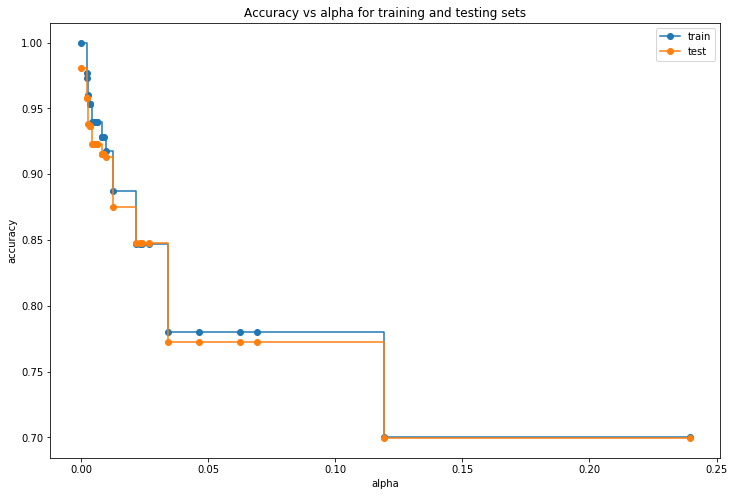

In [19]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state = 0, 
                                      ccp_alpha = ccp_alpha
                                     )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1])
     )

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize = (12, 8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, 
        train_scores, 
        marker = 'o', 
        label = "train", 
        drawstyle = "steps-post"
       )
ax.plot(ccp_alphas, 
        test_scores, 
        marker = 'o', 
        label = "test",
        drawstyle = "steps-post"
       )
ax.legend()
plt.show()

In [20]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', 
                                  max_depth = 9, 
                                  min_impurity_decrease = 0.0, 
                                  min_samples_split = 10, 
                                  ccp_alpha = 0.0
                                 )
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[360,   3,   0,   0],
       [  4, 101,   1,   9],
       [  0,   3,  13,   0],
       [  2,   0,   1,  22]])

In [21]:
print("Train Accuracy:", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

Train Accuracy: 0.9710504549214226
Test Accuracy: 0.9556840077071291


---------

## Avançado: 

#### Vamos melhorar a acurácia com outros algoritmos de classificação

# SVM

In [29]:
from sklearn import svm

#Use C=1
clf = svm.SVC(kernel = 'linear', 
              C = 1.0, 
              decision_function_shape = 'ovr'
             )
clf.fit(X_train, 
        y_train
       )
# fazendo predições
y_pred = clf.predict(X_test)
# calculando e imprimindo as métricas
cnf_matrix = metrics.confusion_matrix(y_test, 
                                      y_pred
                                     )
cnf_matrix

array([[341,  21,   1,   0],
       [ 47,  66,   0,   2],
       [  0,   2,  14,   0],
       [  8,   1,   1,  15]])

In [30]:
print("Train Accuracy:", metrics.accuracy_score(y_train, 
                                                clf.predict(X_train)
                                               )
     )
print("Test Accuracy:", metrics.accuracy_score(y_test, 
                                               y_pred
                                              )
     )

Train Accuracy: 0.8618693134822167
Test Accuracy: 0.8400770712909441


# Logistic Regression

In [31]:
#importando o modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression

# instanciando o modelo classificador (clf)
clf = LogisticRegression(dual = False, 
                         max_iter = 5000
                        )
# ajustando o modelo com os dados de treino
clf.fit(X_train, 
        y_train
       )
# fazendo predições para os dados de teste
y_pred = clf.predict(X_test)

# calculando e imprimindo as métricas
cnf_matrix = metrics.confusion_matrix(y_test, 
                                      y_pred
                                     )
cnf_matrix

array([[338,  22,   2,   1],
       [ 47,  65,   1,   2],
       [  0,   5,  11,   0],
       [  2,  15,   1,   7]])

In [32]:
print("Train Accuracy:", metrics.accuracy_score(y_train, 
                                                clf.predict(X_train)
                                               )
     )
print("Test Accuracy:", metrics.accuracy_score(y_test, 
                                               y_pred
                                              )
     )

Train Accuracy: 0.8395368072787428
Test Accuracy: 0.8111753371868978


# KNN

In [33]:
#implementanto do KNN
from sklearn.neighbors import KNeighborsClassifier

# instanciando o modelo
knn = KNeighborsClassifier()
# ajustando o modelo com os dados de treino
knn.fit(X_train, 
        y_train
       )
# fazendo predições para os dados de teste
y_pred = knn.predict(X_test)
# calculando e imprimindo as métricas
cnf_matrix = metrics.confusion_matrix(y_test, 
                                      y_pred
                                     )
cnf_matrix

array([[360,   3,   0,   0],
       [ 14,  99,   0,   2],
       [  0,   3,  13,   0],
       [  7,   1,   2,  15]])

In [34]:
print("Train Accuracy:", metrics.accuracy_score(y_train, 
                                                clf.predict(X_train)
                                               )
     )
print("Test Accuracy:", metrics.accuracy_score(y_test, 
                                               y_pred
                                              )
     )

Train Accuracy: 0.8395368072787428
Test Accuracy: 0.9383429672447013
